
# Quantum States in Quantum Optics

This notebook explores key quantum states used in quantum optics, including:
- Fock States
- Coherent States
- Squeezed States
- Thermal States
- Cat States
- Superposition States
- Gaussian States

We discuss their definitions, mathematical representations, properties, applications, and visualize their phase-space distributions using Wigner, Q, and P functions.


---
## Fock States (Number state $|n\rangle$)
- **Definition**: Eigenstates of the photon number operator: 

$$
\hat{n} |n\rangle = n |n\rangle 
$$
- **Characteristics**:
  - Fixed number of photons.
  - No phase information.
  - Highly non-classical.
- **Why interesting**:
  - Fundamental building blocks of quantum optics.
  - Exhibit quantum noise and uncertainty differently than coherent states.
- **Applications**: 
  - Quantum metrology.
  - Quantum information (e.g., encoding qubits).
  - Photon counting experiments.

## Coherent States
- **Definition**: Eigenstates of the annihilation operator 
$$
\hat{a} |\alpha\rangle = \alpha |\alpha\rangle 
$$
- **Expansion in the Fock Basis**: 
$$
|\alpha\rangle = e^{-\frac{|\alpha|^2}{2}} \sum_{n=0}^{\infty} \frac{\alpha^n}{\sqrt{n!}} |n\rangle 
$$
- **Properties**: 
  - Minimum uncertainty 
  - Classical-like behavior
- **Applications**: 
  - Laser physics
  - Quantum communication


## Squeezed States
- **Definition**: States where the uncertainty in one quadrature is reduced below the vacuum level, at the expense of increased uncertainty in the conjugate quadrature:
$$
|\zeta \rangle = \hat{S}(\zeta)|0\rangle,
$$ 
where $\hat{S}(\zeta) = \exp\left[\frac{1}{2}(\zeta^* \hat{a}^2 - \zeta \hat{a}^{\dagger 2})\right]$ is called the squeezing operator.
- **Characteristics**: Reduced noise in one quadrature
- **Why interesting**:
  - Breaks the symmetry of vacuum fluctuations.
  - Demonstrates quantum enhancement.
- **Applications**: 
  - Gravitational wave detection (e.g., LIGO).
  - Quantum cryptography.
  - Quantum-enhanced sensing.



## Thermal States
- **Definition**: Mixed states representing light in thermal equilibrium.
$$ 
\rho_{\text{th}} = \sum_{n=0}^{\infty} \frac{\bar{n}^n}{(\bar{n}+1)^{n+1}} |n\rangle\langle n| 
$$
- **Characteristics**:
  - Described by a Bose-Einstein distribution.
  - High photon number fluctuations.
- **Why interesting**:
  - Models blackbody radiation and ambient light.
  - Useful for understanding decoherence.
- **Applications**:
  - Quantum thermodynamics.
  - Noise modeling in quantum communication.



## Cat States (Schrödinger Cat States)
- **Definition**: Superpositions of coherent states: 
$$
|\text{Cat}_\pm\rangle = \mathcal{N}_\pm (|\alpha\rangle \pm |-\alpha\rangle) 
$$
- **Characteristics**:
  - Highly non-classical.
  - Exhibit quantum interference.
- **Why interesting**:
  - Illustrate quantum superposition at macroscopic scales.
  - Sensitive to decoherence.
- **Applications**:
  - Quantum computing (e.g., bosonic codes).
  - Quantum error correction.
  - Fundamental tests of quantum mechanics.



## Superposition of Energy Eigenstates
- **Definition**: A superposition of two number states, with maximally different energies (two Fock states where the number of photons is as far apart as possible) 
$$
|\psi\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |n\rangle) 
$$
- **Characteristics**:
  - The Wigner function shows interference fringes
  - The energy variance is large, which enhances sensitivity
  - The quantum Fisher information is high, indicating metrological usefulness
- **Why interesting**:
  - These states exhibit fast phase evolution due to large energy differences
  - They are highly sensitive to phase shifts, making them ideal for quantum metrology
  - They can be used to estimate parameters (like time or phase) with Heisenberg-limited precision
- **Applications**:
  - Quantum metrology (e.g., phase estimation)
  - Quantum clocks
  - Fundamental studies of decoherence and time evolution



## Gaussian States
- **Definition**: A Gaussian state is any quantum state whose Wigner function (or equivalently, characteristic function or Q-function) is a Gaussian in phase space.
- **Examples**:
  - Vacuum state
  - Coherent states
  - Squeezed states
  - Thermal states
  - Displaced squeezed states
  - Two-mode squeezed states
- **Why interesting**:
  - They are fully characterized by their first and second moments (mean and covariance matrix)
  - They form the backbone of continuous-variable quantum information
  - They are experimentally accessible and mathematically tractable
- **Applications**:
  - Quantum communication (e.g., CV quantum key distribution)
  - Quantum sensing and metrology
  - Quantum simulation and computation (especially in bosonic systems)

---
## Phase-Space Representations
We use three functions to represent quantum states in phase space:

| Function | Description | Properties |
|---------|-------------|------------|
| **Wigner** | Quasi-probability, can be negative | Reveals quantum interference |
| **Q-function** | Smoothed probability | Always positive |
| **P-function** | Coherent state decomposition | Often singular for non-classical states |

Below are visualizations of Wigner and Q-functions for various states.



## Phase-Space Representations Summary

| **State Type**      | **Wigner Function**                          | **Q-Function**                          | **P-Function**                          |
|---------------------|----------------------------------------------|-----------------------------------------|-----------------------------------------|
| **Fock**            | Ring-like, negative regions                  | Peak at origin, no phase info           | Highly singular                         |
| **Coherent**        | Gaussian, always positive                    | Gaussian, smooth                        | Delta function at α                     |
| **Squeezed**        | Elliptical, possibly negative                | Elliptical, smooth                      | Singular                                |
| **Thermal**         | Broad Gaussian                               | Broad Gaussian                          | Gaussian                                |
| **Cat**             | Two peaks + interference fringes             | Two peaks, smooth interference          | Highly singular                         |
| **Superposition**   | Interference fringes, fast phase evolution   | Complex structure                       | Singular                                |
| **Gaussian (general)** | Always Gaussian, may show squeezing       | Always smooth and positive              | May be singular or regular depending on state |


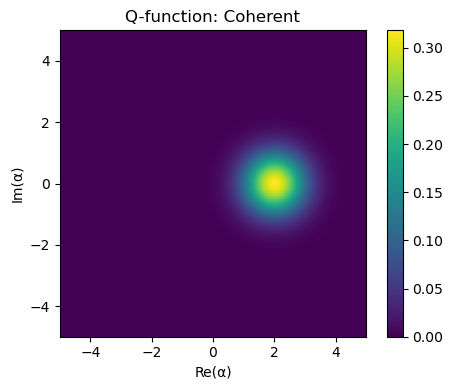

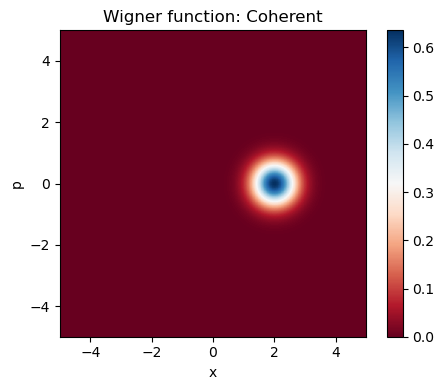

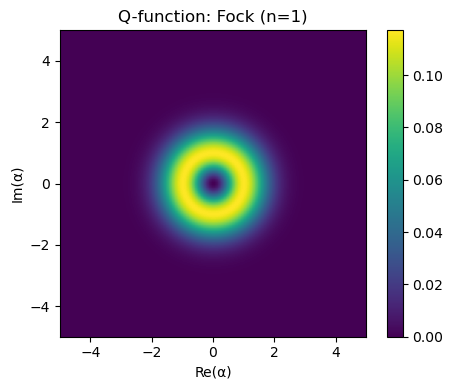

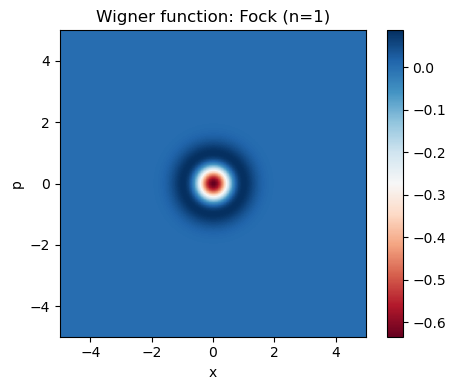

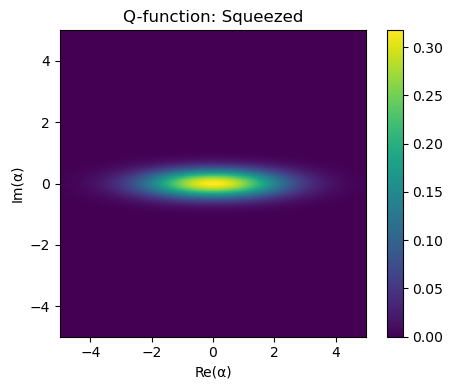

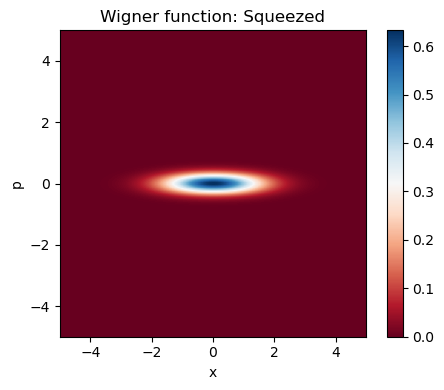

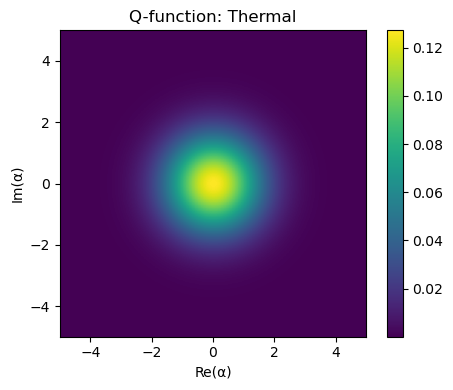

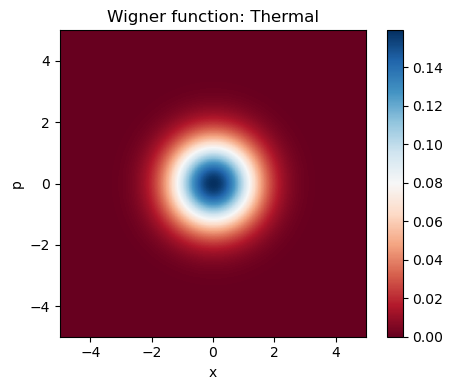

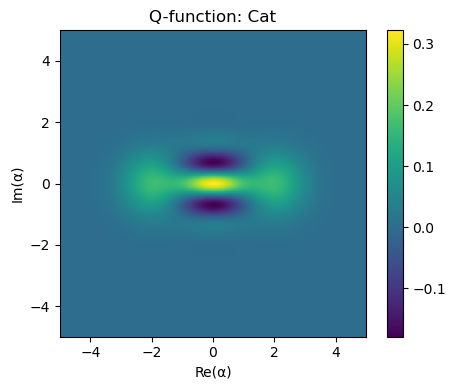

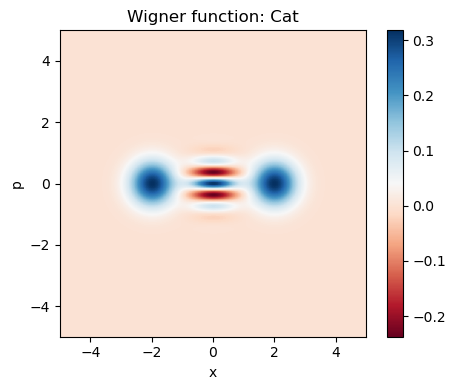

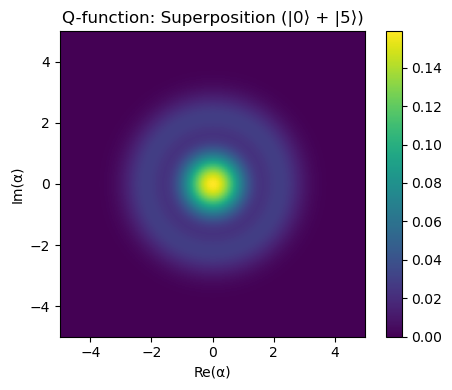

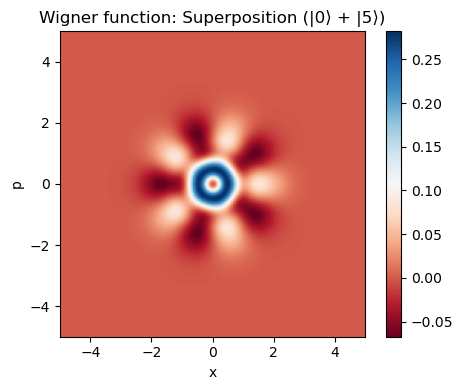

In [ ]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from numpy.polynomial.laguerre import lagval


# Storage for plots
Q_list = []       # Stores Q-function arrays
W_list = []       # Stores Wigner function arrays
titles = []       # Stores titles for each state

# Define phase space grid
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Plotting functions
def plot_Q_function(state_name, Q):
    plt.figure(figsize=(5, 4))
    plt.imshow(Q, extent=[-5, 5, -5, 5], origin='lower', cmap='viridis')
    plt.title(f"Q-function: {state_name}")
    plt.xlabel("Re(α)")
    plt.ylabel("Im(α)")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

def plot_Wigner_function(state_name, W):
    plt.figure(figsize=(5, 4))
    plt.imshow(W, extent=[-5, 5, -5, 5], origin='lower', cmap='RdBu')
    plt.title(f"Wigner function: {state_name}")
    plt.xlabel("x")
    plt.ylabel("p")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# Coherent state
alpha = 2.0
Q_coherent = np.exp(-np.abs(Z - alpha)**2) / np.pi
W_coherent = 2 * np.exp(-2 * ((X - np.real(alpha))**2 + (Y - np.imag(alpha))**2)) / np.pi
#plot_Q_function("Coherent", Q_coherent)
#plot_Wigner_function("Coherent", W_coherent)


Q_list.append(Q_coherent)
W_list.append(W_coherent)
titles.append("Coherent")


# Fock state (n=1)
n = 1
Q_fock = (np.abs(Z)**(2*n) * np.exp(-np.abs(Z)**2)) / (np.pi * factorial(n))
L = lagval(2*(X**2 + Y**2), [0]*n + [1])
W_fock = 2 * (-1)**n * np.exp(-2*(X**2 + Y**2)) * L / np.pi
#plot_Q_function("Fock (n=1)", Q_fock)
#plot_Wigner_function("Fock (n=1)", W_fock)


Q_list.append(Q_fock)
W_list.append(W_fock)
titles.append("Fock (n=1)")


# Squeezed state
r = 0.8
Xs = X * np.exp(-r)
Ys = Y * np.exp(r)
Q_squeezed = np.exp(-Xs**2 - Ys**2) / np.pi
W_squeezed = 2 * np.exp(-2 * (X**2 * np.exp(-2*r) + Y**2 * np.exp(2*r))) / np.pi
#plot_Q_function("Squeezed", Q_squeezed)
#plot_Wigner_function("Squeezed", W_squeezed)


Q_list.append(Q_squeezed)
W_list.append(W_squeezed)
titles.append("Squeezed")


# Thermal state
n_th = 1.5
Q_thermal = 1 / (np.pi * (n_th + 1)) * np.exp(-np.abs(Z)**2 / (n_th + 1))
sigma2 = n_th + 0.5
W_thermal = 1 / (np.pi * sigma2) * np.exp(-(X**2 + Y**2) / sigma2)
#plot_Q_function("Thermal", Q_thermal)
#plot_Wigner_function("Thermal", W_thermal)


Q_list.append(Q_thermal)
W_list.append(W_thermal)
titles.append("Thermal")


# Cat state
alpha_cat = 2.0
Q_cat = (np.exp(-np.abs(Z - alpha_cat)**2) + np.exp(-np.abs(Z + alpha_cat)**2) +
         2 * np.real(np.exp(-np.abs(Z)**2) * np.exp(2j * np.imag(Z) * alpha_cat))) / (2 * np.pi)
W1 = W_coherent
W2 = 2 * np.exp(-2 * ((X + np.real(alpha_cat))**2 + (Y + np.imag(alpha_cat))**2)) / np.pi
interference = 2 * np.exp(-2 * (X**2 + Y**2)) * np.cos(4 * Y * np.real(alpha_cat)) / np.pi
W_cat = (W1 + W2 + interference) / 2
plot_Q_function("Cat", Q_cat)
plot_Wigner_function("Cat", W_cat)


Q_list.append(Q_cat)
W_list.append(W_cat)
titles.append("Cat")


# Superposition state |ψ⟩ = (|0⟩ + |n⟩)/√2 with n=5
n_sup = 5
Q_sup = (np.exp(-np.abs(Z)**2) + (np.abs(Z)**(2*n_sup) * np.exp(-np.abs(Z)**2)) / factorial(n_sup)) / (2 * np.pi)
L0 = 1
Ln = lagval(2*(X**2 + Y**2), [0]*n_sup + [1])
cross = 2 * np.exp(-(X**2 + Y**2)) * ((X**2 + Y**2)**(n_sup/2)) / np.sqrt(factorial(n_sup)) * np.cos(n_sup * np.arctan2(Y, X))
W_sup = (2 * np.exp(-2*(X**2 + Y**2)) * L0 / np.pi + 2 * (-1)**n_sup * np.exp(-2*(X**2 + Y**2)) * Ln / np.pi + cross) / 2
plot_Q_function("Superposition (|0⟩ + |5⟩)", Q_sup)
plot_Wigner_function("Superposition (|0⟩ + |5⟩)", W_sup)


Q_list.append(Q_sup)
W_list.append(W_sup)
titles.append("Superposition (|0⟩ + |5⟩)")



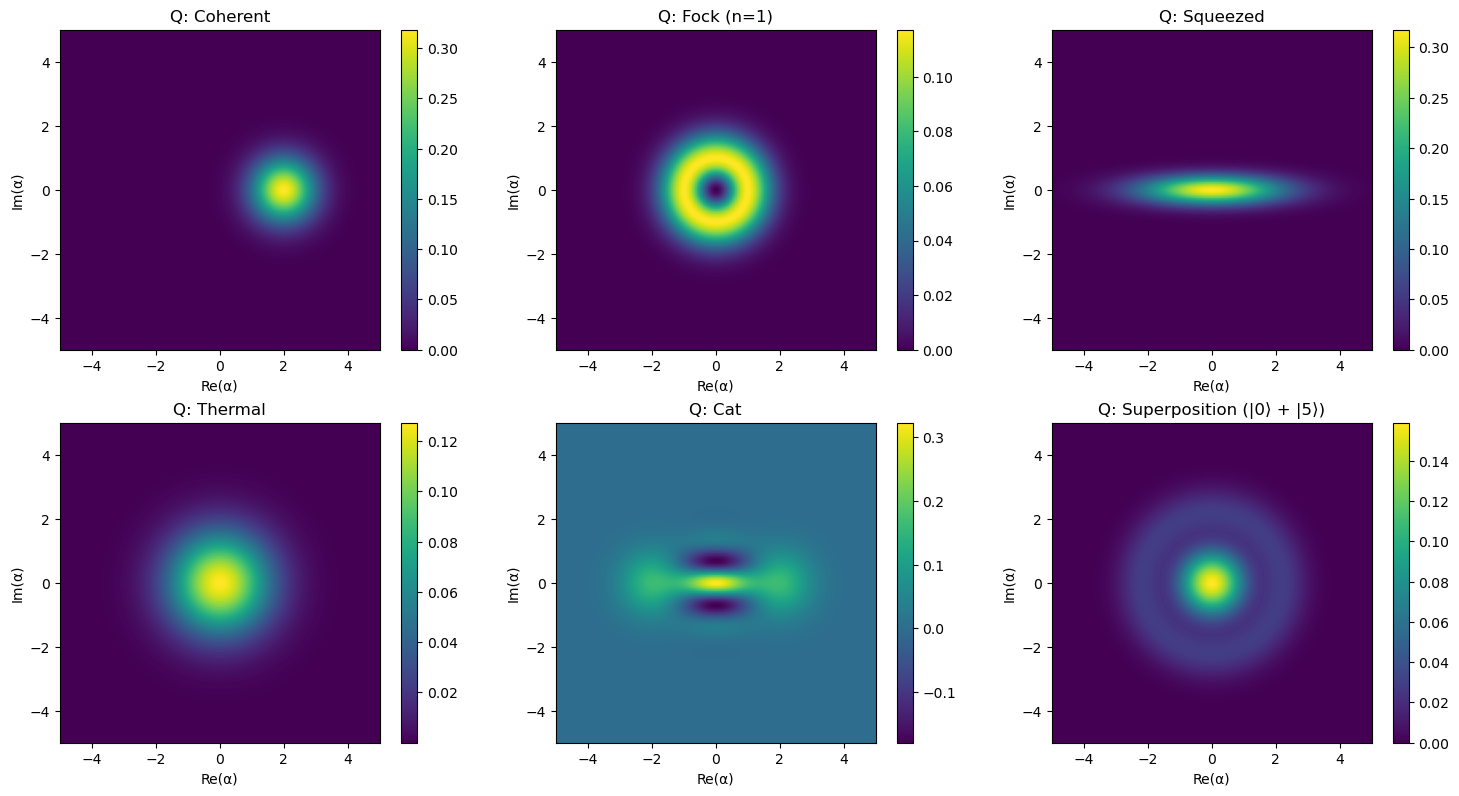

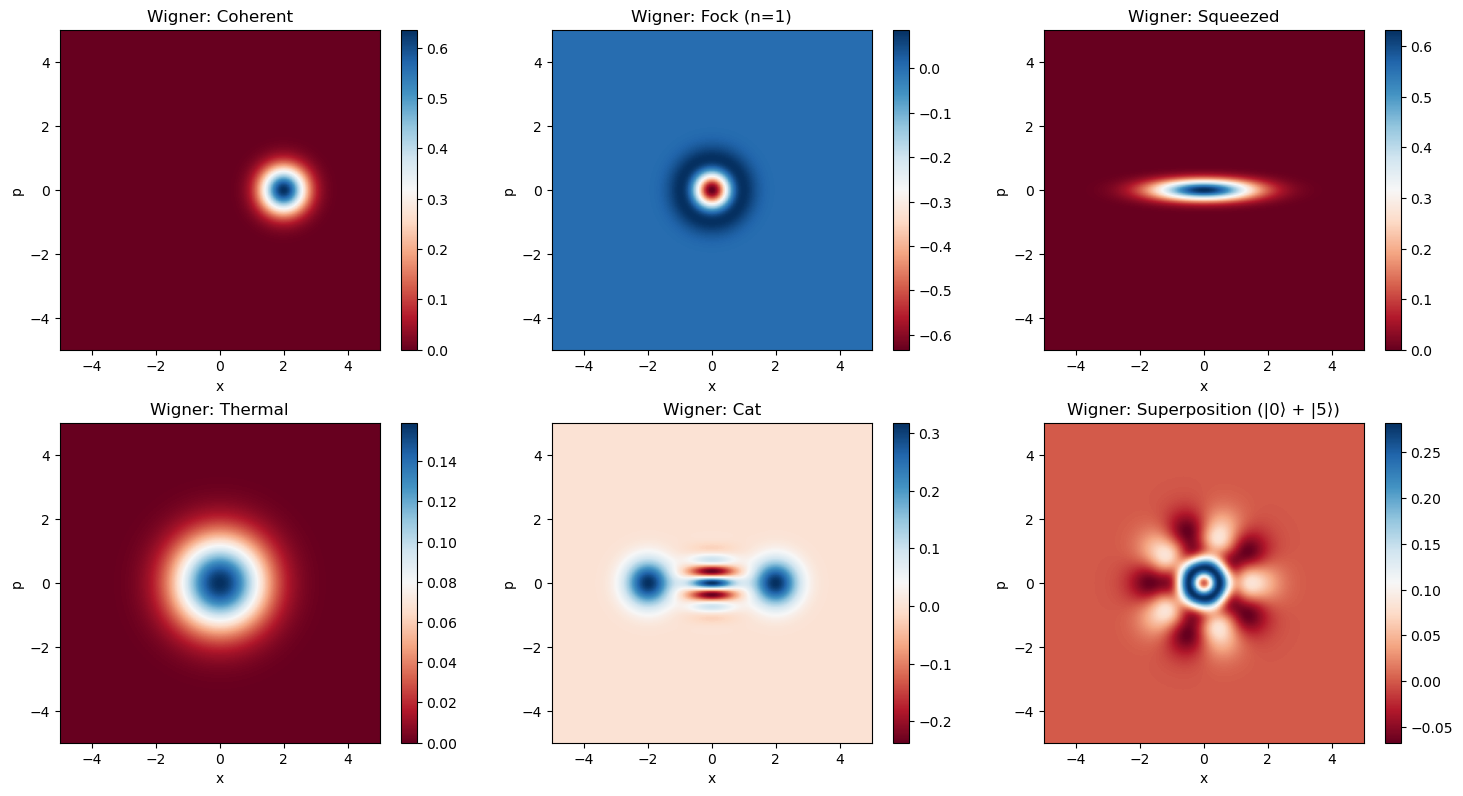

In [10]:

# After computing Q_list, W_list, and titles...

# Plot all Q-functions in a 3x2 grid
fig_q, axs_q = plt.subplots(2, 3, figsize=(15, 8))
for i, ax in enumerate(axs_q.ravel()):
    im = ax.imshow(Q_list[i], extent=[-5, 5, -5, 5], origin='lower', cmap='viridis')
    ax.set_title(f"Q: {titles[i]}")
    ax.set_xlabel("Re(α)")
    ax.set_ylabel("Im(α)")
    fig_q.colorbar(im, ax=ax)
fig_q.tight_layout()
plt.show()

# Plot all Wigner functions in a 3x2 grid
fig_w, axs_w = plt.subplots(2, 3, figsize=(15, 8))
for i, ax in enumerate(axs_w.ravel()):
    im = ax.imshow(W_list[i], extent=[-5, 5, -5, 5], origin='lower', cmap='RdBu')
    ax.set_title(f"Wigner: {titles[i]}")
    ax.set_xlabel("x")
    ax.set_ylabel("p")
    fig_w.colorbar(im, ax=ax)
fig_w.tight_layout()
plt.show()
